In [267]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.utils import shuffle

# a.	Carregamento do conjunto de dados público das ações do google, o conjunto de dados foi baixado do site web kaggle.

In [268]:
filePath = 'GOOGL.csv' #getting data path

#Date,Open,High,Low,Close,Adj Close,Volume

data = pd.read_csv(filePath, names=["Date", 
        "Open", "High", "Low", 
	    "Close", "Adj Close",
	    "Volume"]) #read data from pandas

print(data.head(), data[-5:-1], data.shape)

          Open      High       Low     Close  Adj Close    Volume
4177 -2.445681 -2.462297 -2.476107 -2.549683  -2.549683 -0.442809
4178 -2.538956 -2.551888 -2.613986 -2.549974  -2.549974  0.328655
4179 -2.527702 -2.577387 -2.581475 -2.582072  -2.582072 -0.238035
4180 -2.567255 -2.537324 -2.574772 -2.494623  -2.494623 -0.348287
4181 -2.440671 -2.482411 -2.446152 -2.491800  -2.491800 -0.287448           Open      High       Low     Close  Adj Close    Volume
4426  0.087355  0.219244  0.105380  0.315364   0.315364  0.984971
4427  0.312348  0.285010  0.259054  0.313371   0.313371 -0.323061
4428  0.307255  0.611390  0.427391  0.626168   0.626168  0.319752
4429  0.520912  0.492139  0.572643  0.493915   0.493915 -0.447557 (254, 6)


# b.	Os dados são truncados para obter o período desejado: 2021/03/24 – 2022/03/24

In [ ]:
data = data.truncate(before=4177) #getting data from 2021 to 2022
print(data.head(), data[-5:-1], data.shape)

# c.	Normalização do conjunto de dados usando zscore

In [ ]:
data = data.select_dtypes(include='number').apply(zscore) #Normalizing datafrem
print(data.head(), data[-5:-1], data.shape)

# d.	Divisão do conjunto de dados

In [269]:
features = data.drop(['Close'], axis=1) #getting the training features
#features = features.select_dtypes(include='number').apply(zscore) 
labels = data['Close'] #getting the training labels
print(labels.head(), labels[-5:-1],features.head())

4177   -2.549683
4178   -2.549974
4179   -2.582072
4180   -2.494623
4181   -2.491800
Name: Close, dtype: float64 4426    0.315364
4427    0.313371
4428    0.626168
4429    0.493915
Name: Close, dtype: float64           Open      High       Low  Adj Close    Volume
4177 -2.445681 -2.462297 -2.476107  -2.549683 -0.442809
4178 -2.538956 -2.551888 -2.613986  -2.549974  0.328655
4179 -2.527702 -2.577387 -2.581475  -2.582072 -0.238035
4180 -2.567255 -2.537324 -2.574772  -2.494623 -0.348287
4181 -2.440671 -2.482411 -2.446152  -2.491800 -0.287448


In [270]:
fd = int(.7*len(data)) #Getting first split index point of division 
sd = fd+int(.15*len(data)) #Getting second split index point of division

trainF, validationF, testF = np.split(features, [fd, sd]) #split data in train, test and validation sets
trainLE, validationLE, testLE = np.split(labels, [fd, sd]) #split data in train, test and validation sets
print(trainF.shape, validationF.shape, testF.shape)
print(trainLE.shape, validationLE.shape, testLE.shape)
#print(validationLE[:5])

(177, 5) (38, 5) (39, 5)
(177,) (38,) (39,)


# e.	Definição da rede para tarefa de regressão linear

In [271]:
model = Sequential() #instantiate the Sequential module to create the model
model.add(Dense(3, input_dim=5, activation='relu')) #adding the input layer
#model.add(Dense(2, input_dim=5, activation='relu')) #adding the input layer
model.add(Dense(1, input_dim=5, activation='linear')) #adding the output layer
model.compile(Adam(lr=0.01), loss='mean_absolute_error', metrics=['mae','mse']) #definning the learning rate
print(model.summary())

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 3)                 18        
                                                                 
 dense_49 (Dense)            (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None


c:\Users\guazo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# f.	Treinamento

In [272]:
valSet = (validationF, validationLE)
history = model.fit(trainF, trainLE, epochs=100, validation_data=valSet, verbose= 0) #training the model

# g.	Predição

In [273]:
labelPred = model.predict(testF) #getting predictions
print(np.around(labelPred[:10], 3))
#print(labelPred[:10])
print(np.around(testLE[:10], 3))
#print(testLE[:10])

[[0.094]
 [0.223]
 [0.383]
 [1.24 ]
 [0.982]
 [0.901]
 [0.613]
 [0.551]
 [0.75 ]
 [0.543]]
4392    0.085
4393    0.247
4394    0.441
4395    1.302
4396    0.894
4397    0.911
4398    0.571
4399    0.587
4400    0.769
4401    0.523
Name: Close, dtype: float64


# h.	Obtenção dos resultados

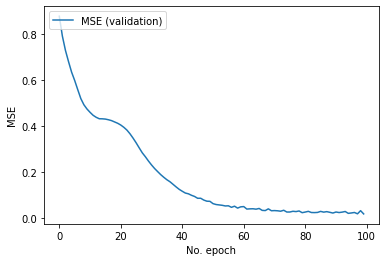

In [274]:
#Plotting data
plt.plot(history.history['val_loss'], label='MSE (validation)')
plt.ylabel('MSE')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.savefig('test.jpg', dpi=300, bbox_inches='tight')
plt.show()